# Generalities for GANs

* Import libraries
* Run on GPU if possible
* Create data loaders

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt

# create directory to save results
!mkdir results

# script parameters
batch_size = 128
log_interval = 100

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# create data loaders
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# Neural Network class

* Generator
* Discriminator


In [ ]:
# Generator Network
class Generator(nn.Module):

    # declare layers
    def __init__(self):
        super(Generator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(20, 400)
        self.fc2 = nn.Linear(400, 784)
    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 784 nodes
    def forward(self, z):
        z=F.relu(self.fc1(z))
        # dummy assignment until this function is filled in
        probabilities = torch.rand(z.shape[0],784).to(device)
        probabilities=torch.sigmoid(self.fc2(z))
        return probabilities

# Discriminator Network
class Discriminator(nn.Module):

    # declare layers
    def __init__(self):
        super(Discriminator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 1)

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 1 node
    def forward(self, x):
        x=F.relu(self.fc1(x))
        # dummy assignment until this function is filled in
        probabilties = torch.rand(x.shape[0],1).to(device)
        probabilities=torch.sigmoid(self.fc2(x))
        return probabilities

# Loss Function

In [ ]:
# GAN Loss Function
#
# Inputs:
#    predictions: array of probabilities indicating whether the images are real or fake 
#    targets: array of 1s (real image) and 0s (fake image)
#
# Output:
#    BCE: binary cross entropy (scalar)
#
def gan_loss_function(predictions, targets):

    # dummy assignment until this function is filled in
    BCE = 0
    BCE = F.binary_cross_entropy(predictions,targets, reduction='sum')
    return BCE

# Training

In [ ]:
# GAN Training
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    generator_optimizer: generator optimizer
#    discriminator: discriminator network
#    discriminator_optimizer: discriminator optimizer
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_train(epoch, generator, generator_optimizer, discriminator, discriminator_optimizer):

    # dummy assignment until this function is filled in
    average_discriminator_loss = 0
    average_generator_loss = 0
    disc_train_loss=0
    gen_train_loss=0
    for batch_idx, (data, _) in enumerate(train_loader):
       
        discriminator.zero_grad()
        data = data.to(device)
        real_label = torch.full((data.shape[0],),1,dtype=torch.float).to(device)
        real_label=real_label.view(-1,1)
        output_Real=discriminator(data.view(-1, 784))
        disc_real_loss=gan_loss_function(output_Real,real_label)
        disc_real_loss.backward()
        noise = torch.randn(data.shape[0], 20).to(device)
        data_fake = generator(noise)
        fake_label = torch.full((data.shape[0],),0,dtype=torch.float).to(device)
        fake_label=fake_label.view(-1,1)
        output_fake=discriminator(data_fake.detach())
        disc_fake_loss=gan_loss_function(output_fake,fake_label)
        disc_fake_loss.backward()
        disc_loss=disc_real_loss.item()+disc_fake_loss.item()
        discriminator_optimizer.step()
        generator.zero_grad()  
        output=discriminator(data_fake)
        gen_loss=gan_loss_function(output,real_label) 
        gen_loss.backward()
        generator_optimizer.step() 
        gen_train_loss+=gen_loss.item()  
        disc_train_loss+=disc_loss
    
    average_discriminator_loss = disc_train_loss/len(train_loader.dataset)
    average_generator_loss =gen_train_loss/len(train_loader.dataset)
    return average_generator_loss, average_discriminator_loss


# Testing


In [ ]:
# GAN Test
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    discriminator: discriminator network
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_test(epoch, generator, discriminator):

    # dummy assignment until this function is filled in
    average_generator_loss = 0
    average_discriminator_loss = 0
    
    generator.eval()
    discriminator.eval()
    disc_test_loss=0
    gen_test_loss=0
    
      
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
          data = data.to(device)
          real_label = torch.full((data.shape[0],),1,dtype=torch.float).to(device)
          real_label=real_label.view(-1,1)
          output_Real=discriminator(data.view(-1, 784))
          disc_real_loss=gan_loss_function(output_Real,real_label)
          noise = torch.randn(data.shape[0], 20).to(device)
          data_fake = generator(noise)
          fake_label = torch.full((data.shape[0],),0,dtype=torch.float).to(device)
          fake_label=fake_label.view(-1,1)
          output_fake=discriminator(data_fake.detach())
          disc_fake_loss=gan_loss_function(output_fake,fake_label)
          disc_loss=disc_real_loss.item()+disc_fake_loss.item()
          output=discriminator(data_fake)
          gen_loss=gan_loss_function(output,real_label) 
          gen_test_loss+=gen_loss.item()  
          disc_test_loss+=disc_loss



    average_generator_loss = gen_test_loss / len(test_loader.dataset)
    average_discriminator_loss=disc_test_loss/len(test_loader.dataset)
    return average_generator_loss, average_discriminator_loss

# Main

Sample of generated images


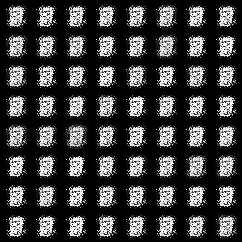



Sample of generated images


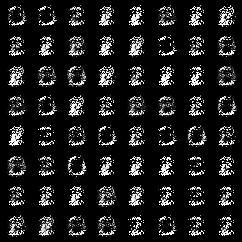



Sample of generated images


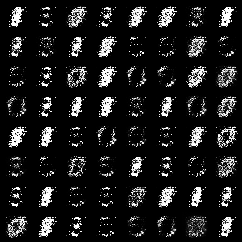



Sample of generated images


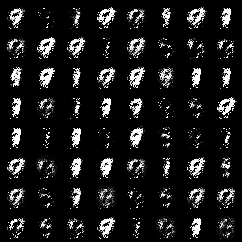



Sample of generated images


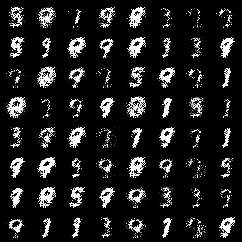



Sample of generated images


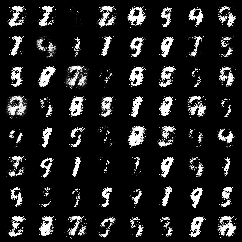



Sample of generated images


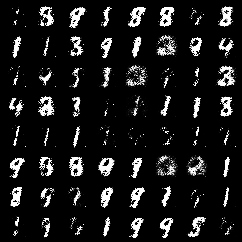



Sample of generated images


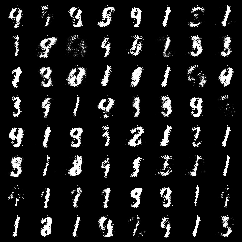



Sample of generated images


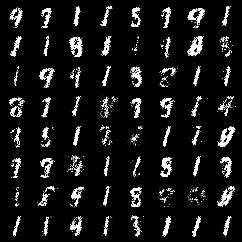



Sample of generated images


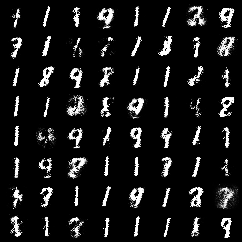



Sample of generated images


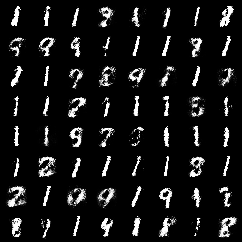



Sample of generated images


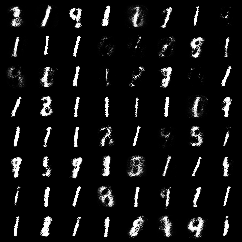



Sample of generated images


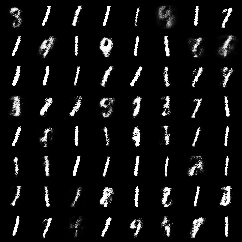



Sample of generated images


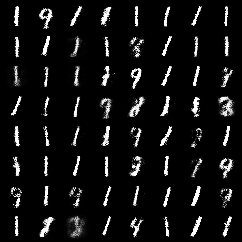



Sample of generated images


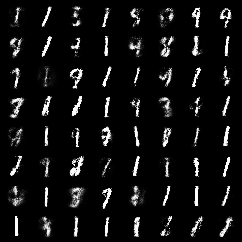



Sample of generated images


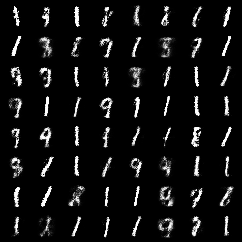



Sample of generated images


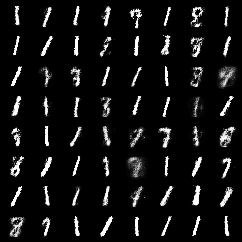



Sample of generated images


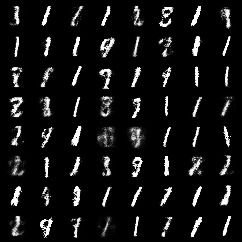



Sample of generated images


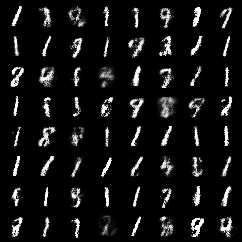



Sample of generated images


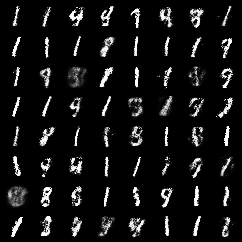



Sample of generated images


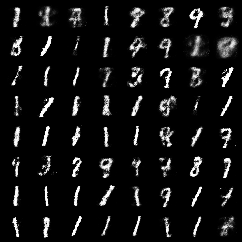



Sample of generated images


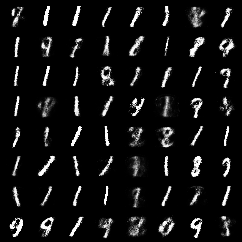



Sample of generated images


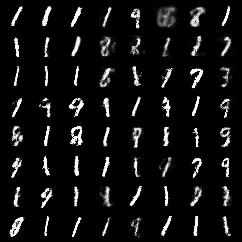



Sample of generated images


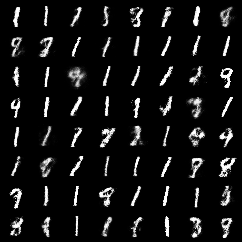



Sample of generated images


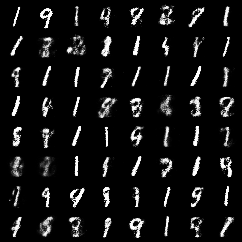



Sample of generated images


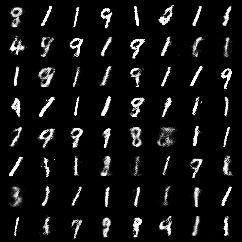



Sample of generated images


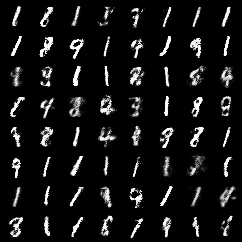



Sample of generated images


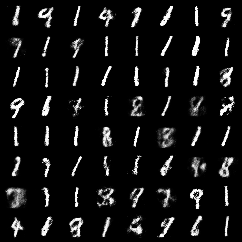



Sample of generated images


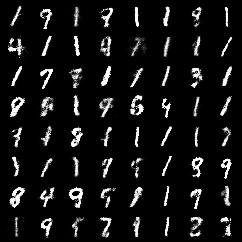



Sample of generated images


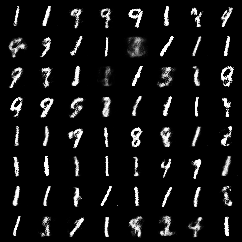



Sample of generated images


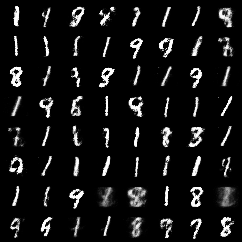



Sample of generated images


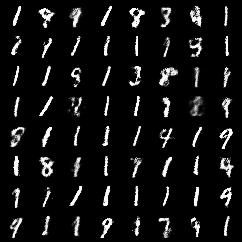



Sample of generated images


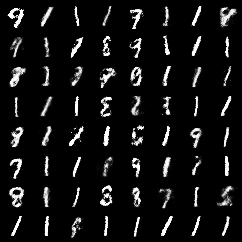



Sample of generated images


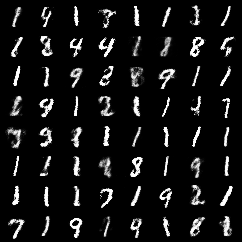



Sample of generated images


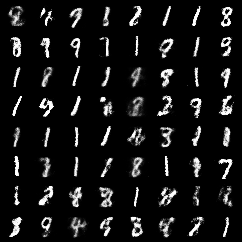



Sample of generated images


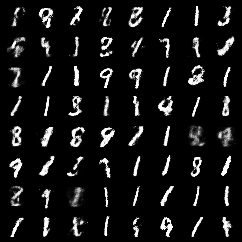



Sample of generated images


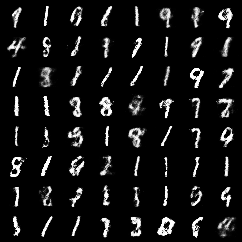



Sample of generated images


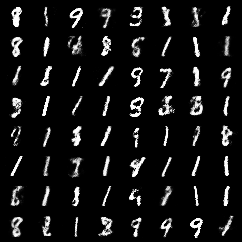



Sample of generated images


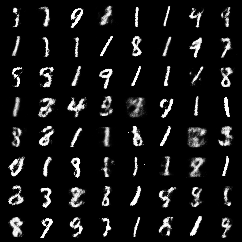



Sample of generated images


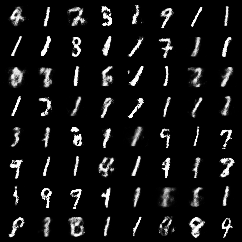



Sample of generated images


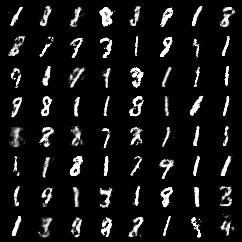



Sample of generated images


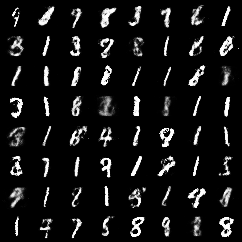



Sample of generated images


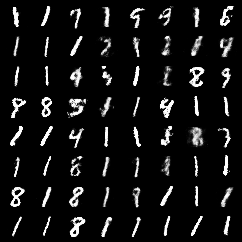



Sample of generated images


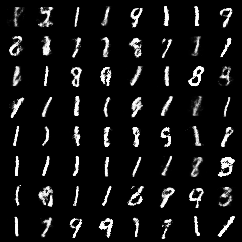



Sample of generated images


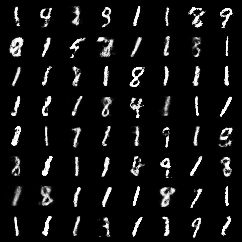



Sample of generated images


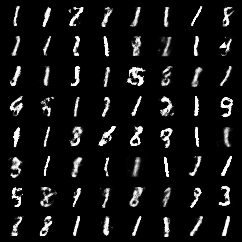



Sample of generated images


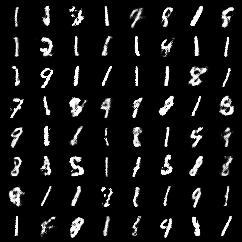



Sample of generated images


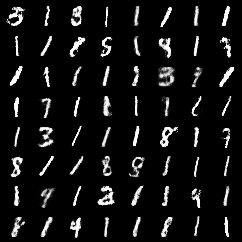



Sample of generated images


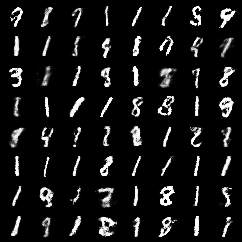



Sample of generated images


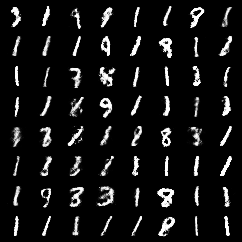

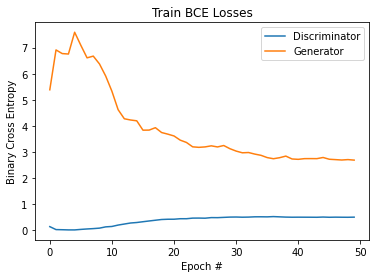

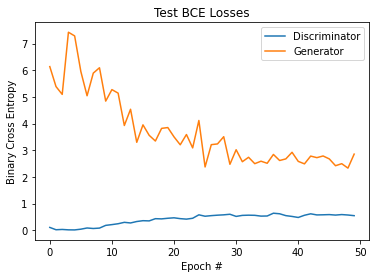

In [ ]:
# train and test gan
epochs = 50
discriminator_average_train_losses = []
discriminator_average_test_losses = []
generator_average_train_losses = []
generator_average_test_losses = []
generator_model = Generator().to(device)
generator_optimizer = optim.Adam(generator_model.parameters(), lr=1e-3)
discriminator_model = Discriminator().to(device)
discriminator_optimizer = optim.Adam(discriminator_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    generator_average_train_loss, discriminator_average_train_loss = gan_train(epoch, generator_model, generator_optimizer, discriminator_model, discriminator_optimizer)
    discriminator_average_train_losses.append(discriminator_average_train_loss)
    generator_average_train_losses.append(generator_average_train_loss)
    generator_average_test_loss, discriminator_average_test_loss = gan_test(epoch, generator_model, discriminator_model)
    discriminator_average_test_losses.append(discriminator_average_test_loss)
    generator_average_test_losses.append(generator_average_test_loss)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = generator_model(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images')
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

# Plot Train losses
plt.plot(discriminator_average_train_losses)
plt.plot(generator_average_train_losses)
plt.title('Train BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()

# Plot Test Losses
plt.plot(discriminator_average_test_losses)
plt.plot(generator_average_test_losses)
plt.title('Test BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()


As we can see our generated images with GAN are more realistic  and sharper than those which were generated by VAE(which were blurred).

VAE are probabilistic while GANs are based on game theory min-max like logic.discriminator and generator competes against each other and therefore as expected improvement in one results in deterioration of the other.as graphs also show we can see that loss of generator decreases and loss of discriminator increases. generator learns with time to generate better samples that look more like real data so that it can fool discriminator.

VAE produces blurry images since it is probabilistic model and each run might produce different pixel values which result in blurry image wherease GAN does not have to explicitly deal with noise which enter system by sampling. GAN deals with noises  differently. there is a discriminator that judges entering sample therefore noise can not affect final generation as easily as in case of VAE.




